In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
col = list(data.columns)
col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Dependents'].replace('3+',3,inplace=True)
data["Dependents"].astype(int)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_3184\2027983011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_3184\2027983011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

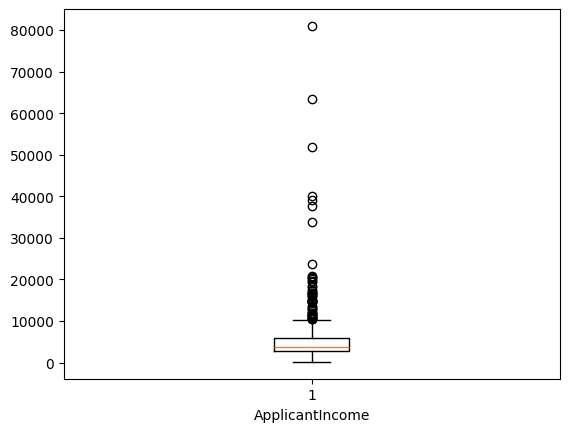

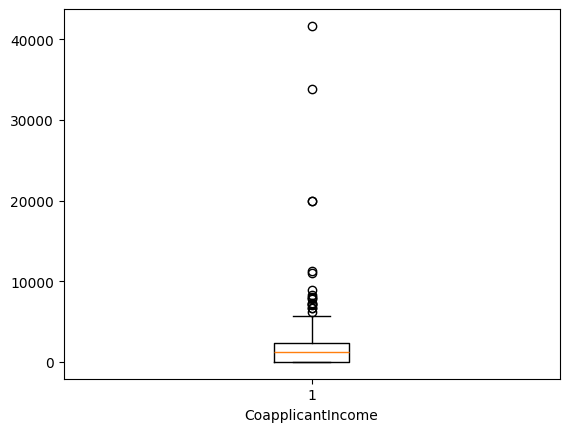

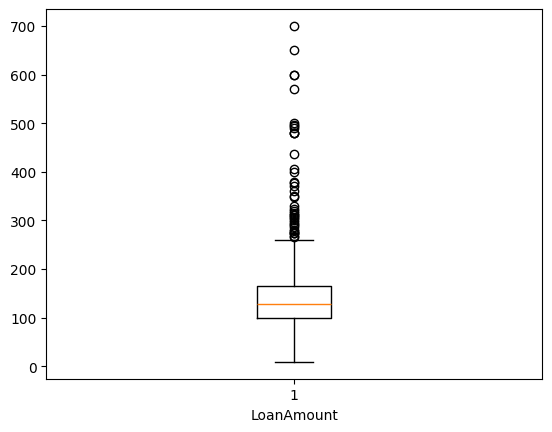

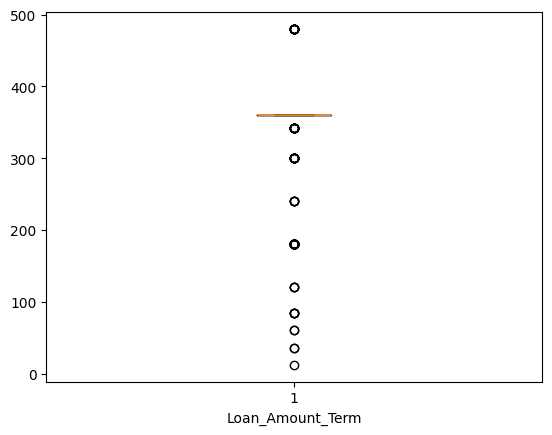

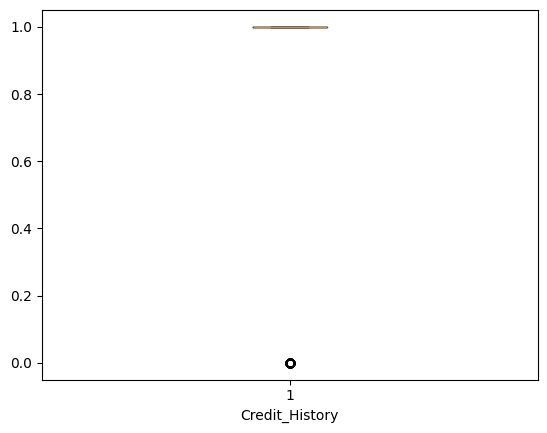

In [10]:
for i in col:
   if data[i].dtype != 'object':
       plt.boxplot(data[i])
       plt.xlabel(i)
       plt.show()

In [11]:
o_col=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in o_col:
    if data[i].dtype != 'object':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        data = data[(data[i] >= lower_bound)&(data[i] <= upper_bound)]

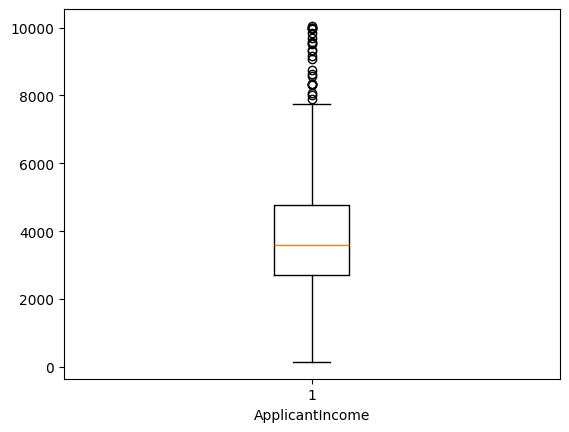

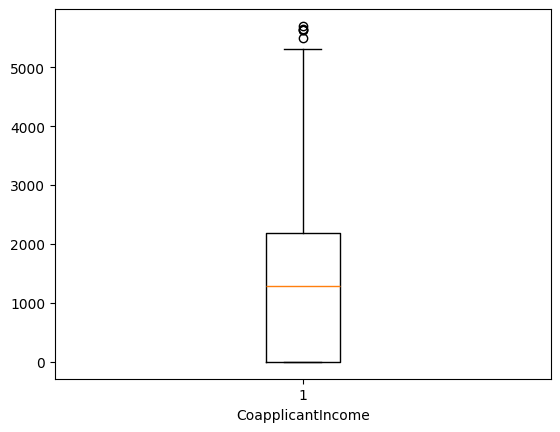

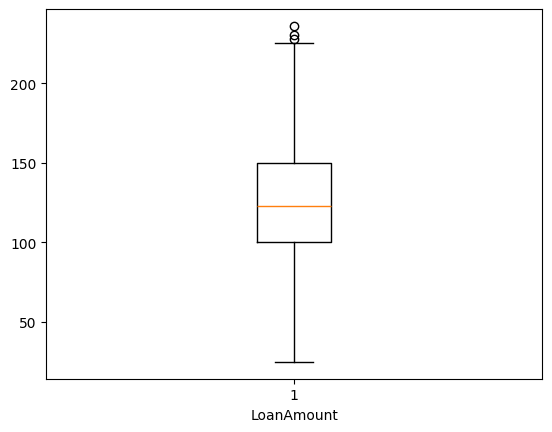

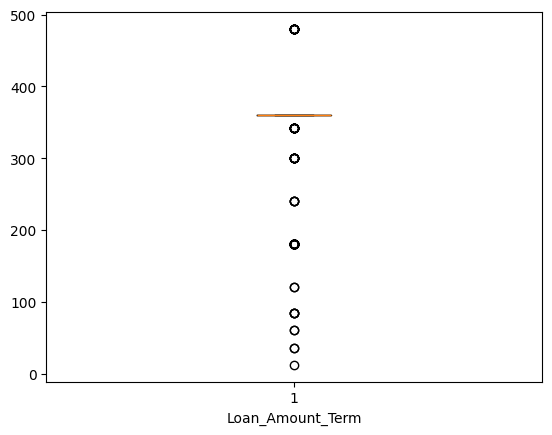

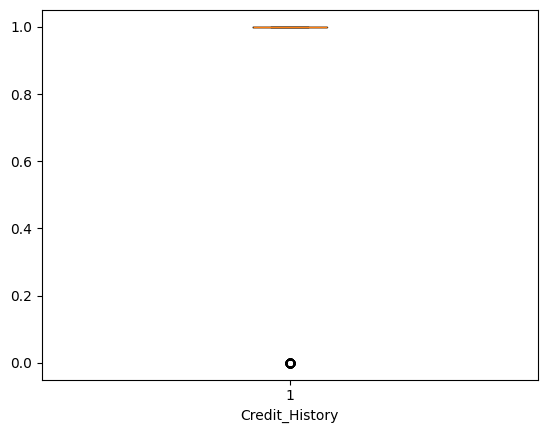

In [12]:
for i in col:
   if data[i].dtype != 'object':
       plt.boxplot(data[i])
       plt.xlabel(i)
       plt.show()

In [13]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,520.000000,520.000000,520.000000,520.000000,520.000000
mean,3995.719231,1317.578692,124.360083,342.092308,0.851923
std,1794.687196,1397.402837,39.984816,65.554395,0.355518
min,150.000000,0.000000,25.000000,12.000000,0.000000
25%,2724.500000,0.000000,100.000000,360.000000,1.000000
50%,3590.500000,1293.500000,123.000000,360.000000,1.000000
75%,4772.750000,2191.000000,150.000000,360.000000,1.000000
max,10047.000000,5701.000000,236.000000,480.000000,1.000000


In [14]:
data.drop('Loan_ID',axis=1,inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
import joblib

label_cols = ["Gender", "Married", "Education", "Self_Employed", "Loan_Status"]
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le   

joblib.dump(label_encoders, "label_encoders.joblib")

['label_encoders.joblib']

In [25]:
pd.get_dummies(data, columns=['Property_Area'], drop_first=False)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Loan_to_income_ratio,EMI_to_income_ratio,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0.025032,0.025032,False,False,True
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,0.021015,0.021015,True,False,False
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,3000.0,0.022000,0.022000,False,False,True
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0.024287,0.024287,False,False,True
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,6000.0,0.023500,0.023500,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,1,5182.0,0.020841,0.020841,True,False,False
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,2900.0,0.024483,0.024483,True,False,False
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,4106.0,0.009742,0.009742,True,False,False
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,7583.0,0.024660,0.024660,False,False,True


In [26]:
data["Total_Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data['Loan_to_income_ratio'] = data['LoanAmount'] / data['Total_Income']
data['EMI_to_income_ratio'] = data['LoanAmount'] / data['Total_Income']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = [
    'Total_Income',
    'LoanAmount',
    'Loan_Amount_Term',
    'Loan_to_income_ratio',
    'EMI_to_income_ratio',
    'ApplicantIncome',
    'CoapplicantIncome']
data[num_cols] = scaler.fit_transform(data[num_cols])
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [28]:
data = pd.get_dummies(data, columns=['Property_Area'], drop_first=False)
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Loan_to_income_ratio,EMI_to_income_ratio,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Gender,1.000000,0.363257,0.194854,0.075762,0.017353,0.056403,0.196096,0.138492,-0.078159,0.006763,0.045152,0.192467,-0.114272,-0.114272,0.072458,-0.116307,0.050024
Married,0.363257,1.000000,0.345310,0.031071,0.011120,-0.011968,0.255721,0.195458,-0.087019,0.008536,0.079509,0.172266,-0.024647,-0.024647,-0.018296,0.019986,-0.002801
Dependents,0.194854,0.345310,1.000000,0.092078,0.045150,0.109729,-0.051804,0.099044,-0.086747,-0.030983,-0.006297,0.063877,0.054152,0.054152,-0.036008,0.030231,0.004025
Education,0.075762,0.031071,0.092078,1.000000,0.001907,-0.136808,-0.027437,-0.095069,-0.077522,-0.082341,-0.117472,-0.145596,0.063086,0.063086,0.078944,-0.055894,-0.019704
Self_Employed,0.017353,0.011120,0.045150,0.001907,1.000000,0.178451,-0.046513,0.087582,-0.069943,0.029646,-0.014147,0.130927,-0.032043,-0.032043,0.040515,0.030204,-0.071813
ApplicantIncome,0.056403,-0.011968,0.109729,-0.136808,0.178451,1.000000,-0.273604,0.431958,-0.085962,0.055551,0.019391,0.724398,-0.338251,-0.338251,0.093462,-0.010246,-0.081924
CoapplicantIncome,0.196096,0.255721,-0.051804,-0.027437,-0.046513,-0.273604,1.000000,0.309554,-0.013364,0.002182,0.062758,0.464879,-0.189687,-0.189687,0.084282,-0.031349,-0.050713
LoanAmount,0.138492,0.195458,0.099044,-0.095069,0.087582,0.431958,0.309554,1.000000,0.064485,-0.001074,-0.027239,0.619484,0.318354,0.318354,0.104168,0.029556,-0.134241
Loan_Amount_Term,-0.078159,-0.087019,-0.086747,-0.077522,-0.069943,-0.085962,-0.013364,0.064485,1.000000,-0.010821,-0.018989,-0.088706,0.154704,0.154704,0.033546,0.065587,-0.101976
Credit_History,0.006763,0.008536,-0.030983,-0.082341,0.029646,0.055551,0.002182,-0.001074,-0.010821,1.000000,0.572195,0.052698,-0.062830,-0.062830,-0.030654,0.038625,-0.010078


In [29]:
data.drop('EMI_to_income_ratio',axis=1,inplace=True)
data.drop('ApplicantIncome',axis=1,inplace=True)
data.drop('CoapplicantIncome',axis=1,inplace=True)
data.drop('Property_Area_Urban',axis=1,inplace=True)

In [30]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Loan_to_income_ratio,Property_Area_Rural,Property_Area_Semiurban
0,1,0,0,0,0,0.552042,0.273436,1.0,1,0.275027,0.037782,False,False
1,1,1,1,0,0,0.091120,0.273436,1.0,0,0.399269,-0.460549,True,False
2,1,1,0,0,1,-1.460962,0.273436,1.0,1,-1.187637,-0.338318,False,False
3,1,1,0,1,0,-0.109148,0.273436,1.0,1,-0.191136,-0.054682,False,False
4,1,0,0,0,0,0.416557,0.273436,1.0,1,0.352550,-0.152252,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,-0.409551,0.273436,1.0,1,-0.067408,-0.482038,True,False
609,0,0,0,0,0,-1.335794,0.273436,1.0,1,-1.238977,-0.030348,True,False
610,1,1,3,0,0,-2.111835,-2.475019,1.0,1,-0.619822,-1.858863,True,False
612,1,1,2,0,0,1.568101,0.273436,1.0,1,1.165255,-0.008309,False,False


In [31]:
from sklearn.model_selection import train_test_split
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred_prob = lr.predict_proba(x_test)[:, 1]
joblib.dump(lr, "logistic_model.joblib")

['logistic_model.joblib']

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_pred_prob)

In [34]:
print("Accuracy is: ",acc)
print("Precision is: ",prec)
print("Recall is: ",rec)
print("F1 score is: ",f1)
print("AUC is: ",auc)

Accuracy is:  0.8076923076923077
Precision is:  0.8088235294117647
Recall is:  0.9482758620689655
F1 score is:  0.873015873015873
AUC is:  0.7664750957854406


In [35]:
#Random Forests classifier
from sklearn.ensemble import RandomForestClassifier
C=RandomForestClassifier(n_estimators=100)
C.fit(x_train,y_train)
joblib.dump(C, "Random_classifier.joblib")

['Random_classifier.joblib']

In [36]:
y_predr = C.predict(x_test)
y_predr_prob = C.predict_proba(x_test)[:, 1]

In [37]:
accr = accuracy_score(y_test, y_predr)
precr = precision_score(y_test, y_predr, zero_division=0)
recr = recall_score(y_test, y_predr, zero_division=0)
f1r = f1_score(y_test, y_predr, zero_division=0)
aucr = roc_auc_score(y_test, y_predr_prob)

In [38]:
print("Accuracy is: ",accr)
print("Precision is: ",precr)
print("Recall is: ",recr)
print("F1 score is: ",f1r)
print("AUC is: ",aucr)

Accuracy is:  0.7716346153846154
Precision is:  0.8095238095238095
Recall is:  0.8793103448275862
F1 score is:  0.8429752066115702
AUC is:  0.7535440613026819
